In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Customer Segmentation Analysis

In [23]:
# Load the data
df = pd.read_excel("Cleaned Customer Segmentation Dataset.xlsx")
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,45,M,3,High School,Married,$60K - $80K,39,1,12691.0,777,11914.0,1144,42
1,49,F,5,Graduate,Single,Less than $40K,44,1,8256.0,864,7392.0,1291,33
2,51,M,3,Graduate,Married,$80K - $120K,36,1,3418.0,0,3418.0,1887,20
3,40,F,4,High School,Unknown,Less than $40K,34,4,3313.0,2517,796.0,1171,20
4,40,M,3,Uneducated,Married,$60K - $80K,21,1,4716.0,0,4716.0,816,28


### Step 3) Data Preprocessing

In [24]:
# Seperate numerical and categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(cat_cols)
print(num_cols)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category']
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [25]:
# One-hot encoding for categorical columns 
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()

,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Gender_M,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,45,3,39,1,12691.0,777,11914.0,1144,42,True,...,False,False,True,False,False,False,True,False,False,False
1,49,5,44,1,8256.0,864,7392.0,1291,33,False,...,False,False,False,True,False,False,False,False,True,False
2,51,3,36,1,3418.0,0,3418.0,1887,20,True,...,False,False,True,False,False,False,False,True,False,False
3,40,4,34,4,3313.0,2517,796.0,1171,20,False,...,False,False,False,False,True,False,False,False,True,False
4,40,3,21,1,4716.0,0,4716.0,816,28,True,...,True,False,True,False,False,False,True,False,False,False


In [26]:
# Scale numerical columns
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
scaled_df.head()

,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Gender_M,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,-0.165406,0.503368,0.384621,-1.327136,0.446622,-0.473422,0.488971,-0.959707,-0.973895,1.059956,...,-0.414857,-0.420076,1.077338,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212
1,0.333570,2.043199,1.010715,-1.327136,-0.041367,-0.366667,-0.008486,-0.916433,-1.357340,-0.943436,...,-0.414857,-0.420076,-0.928214,1.252337,-0.282609,-0.463363,-0.400859,-0.422675,1.357890,-0.351212
2,0.583058,0.503368,0.008965,-1.327136,-0.573698,-1.426858,-0.445658,-0.740982,-1.911206,1.059956,...,-0.414857,-0.420076,1.077338,-0.798507,-0.282609,-0.463363,-0.400859,2.365881,-0.736437,-0.351212
3,-0.789126,1.273283,-0.241473,1.641478,-0.585251,1.661686,-0.734100,-0.951758,-1.911206,-0.943436,...,-0.414857,-0.420076,-0.928214,-0.798507,3.538459,-0.463363,-0.400859,-0.422675,1.357890,-0.351212
4,-0.789126,0.503368,-1.869317,-1.327136,-0.430877,-1.426858,-0.302868,-1.056263,-1.570365,1.059956,...,2.410468,-0.420076,1.077338,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212


### Step 4) Clustering

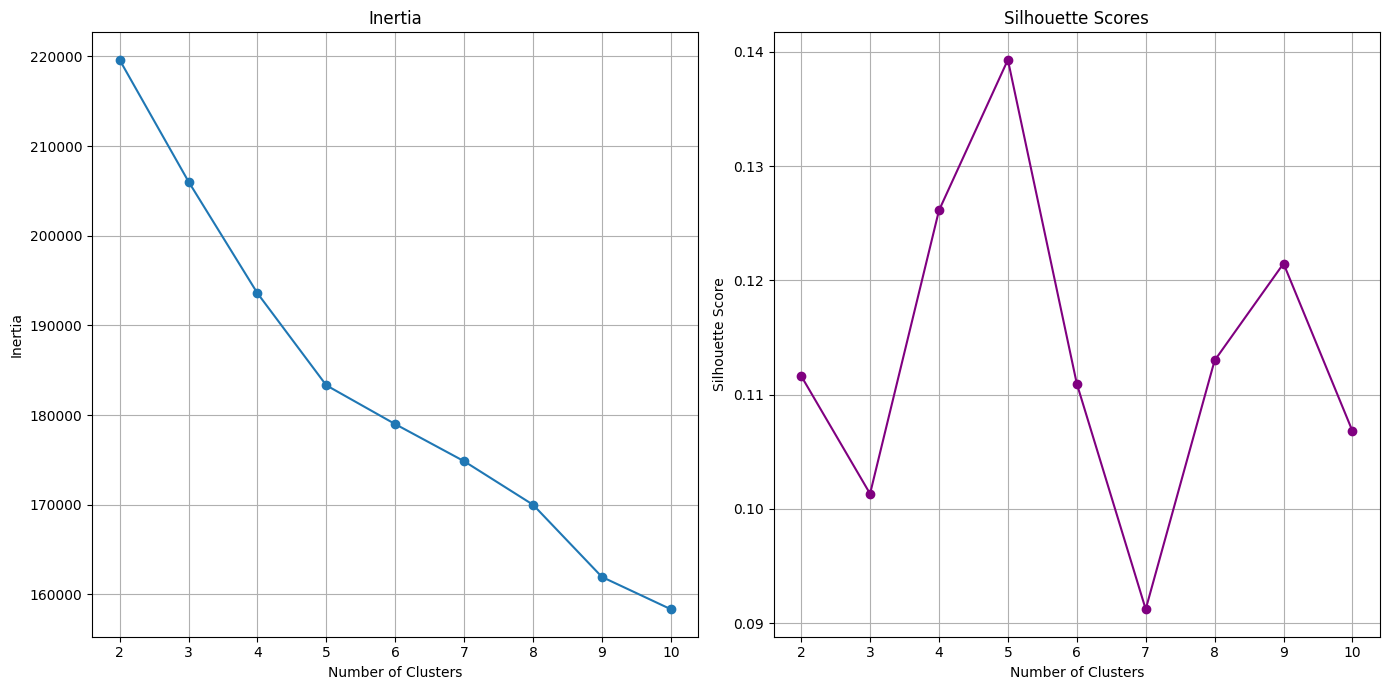

In [ ]:
# Apply Elbow Method and Silhouette Score separately to determine the optimal number of clusters
inertia = []
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, labels)
    scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker="o")
plt.title("Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(2, 11))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), scores, marker="o", color="purple")
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 11))
plt.grid(True)

plt.tight_layout()
plt.show()

We will conclude that k = 9 is the optimal number of clusters since that is associated with thie highest silhouette score. Looking at the graph related to the elbow method, we see there isn't a clear 'elbow' visible which is why we prioritze silhouette score instead.

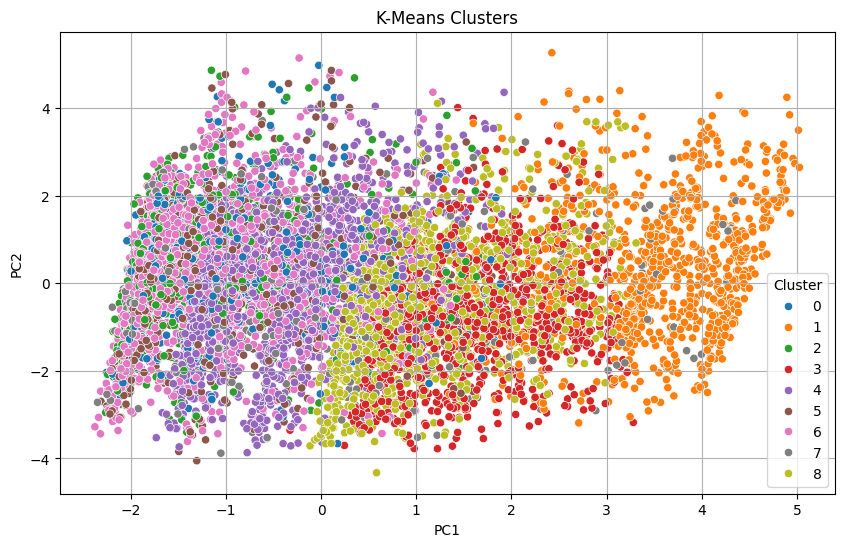

In [35]:
# Apply K-Means
kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(scaled_df)

# Visualize Clusters
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df)

df_pca = pd.DataFrame(components, columns=["PC1", "PC2"])
df_pca["Cluster"] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="tab10")
plt.title("K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

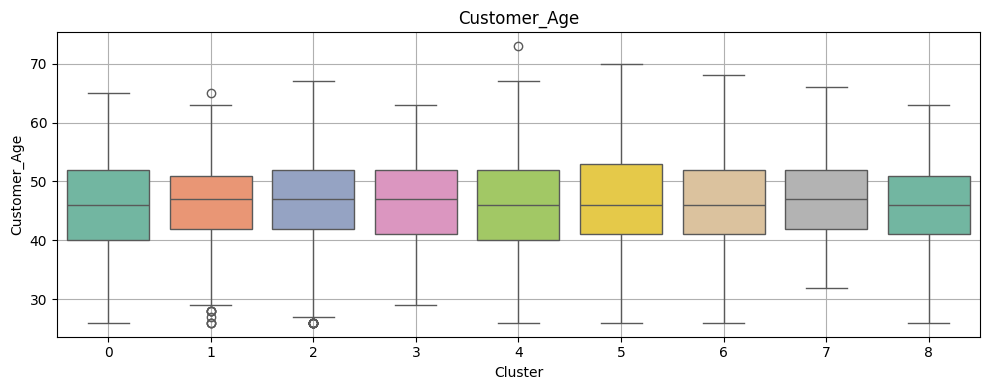

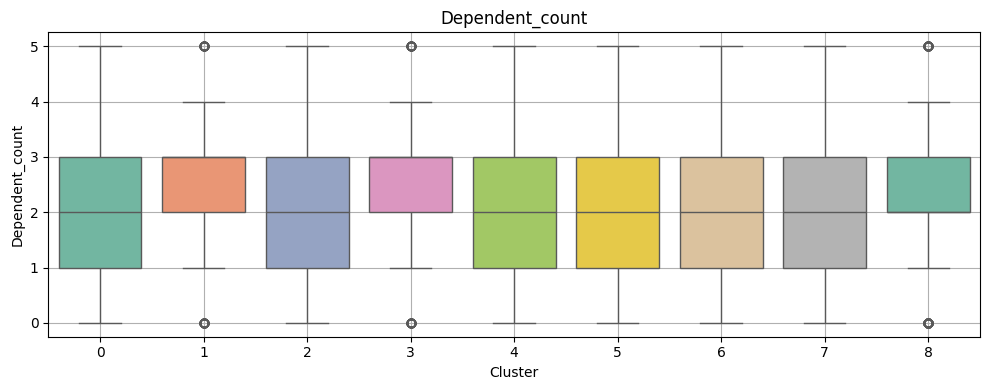

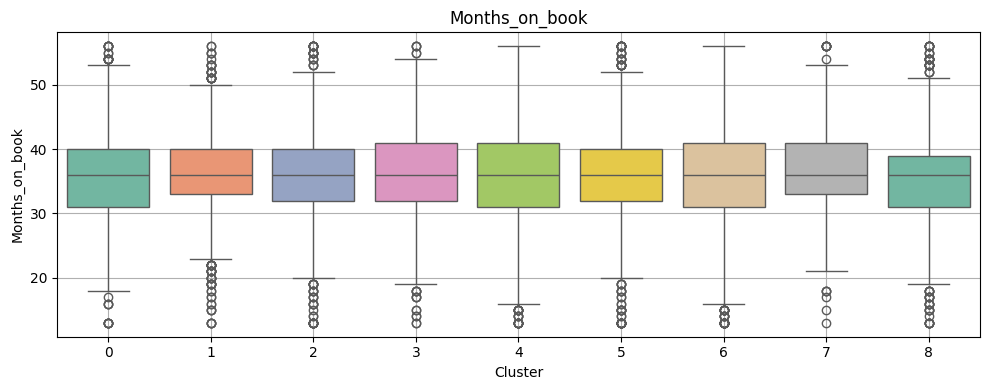

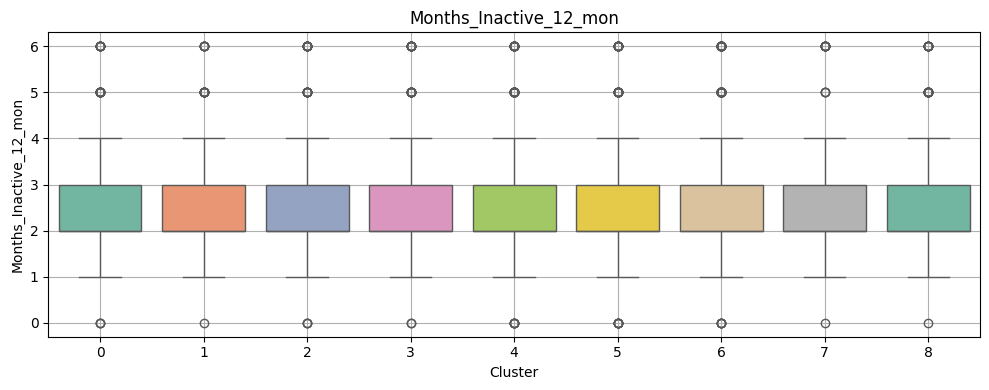

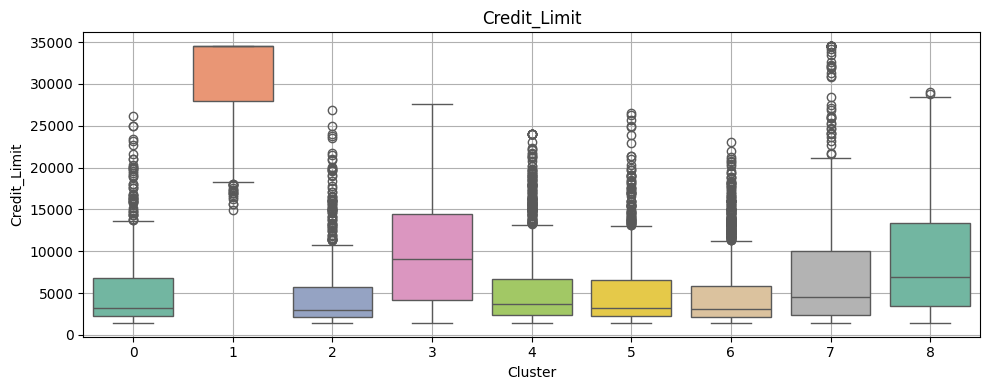

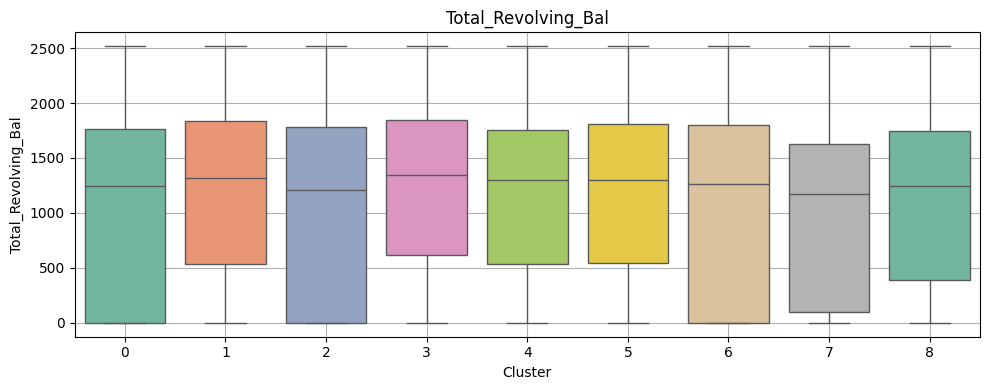

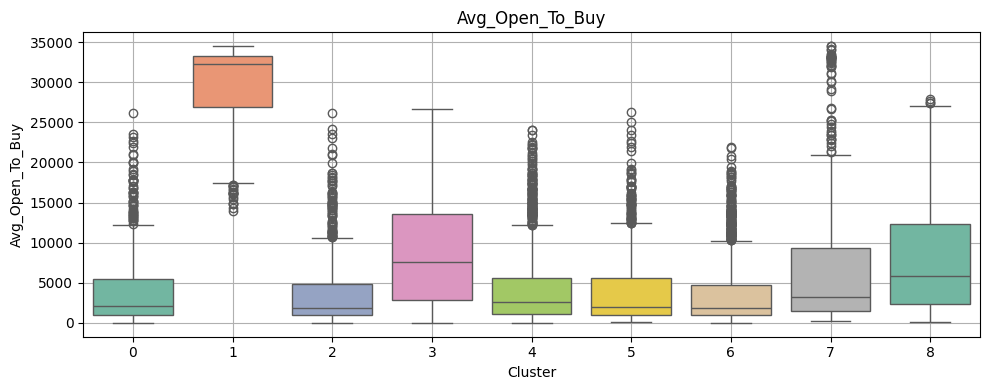

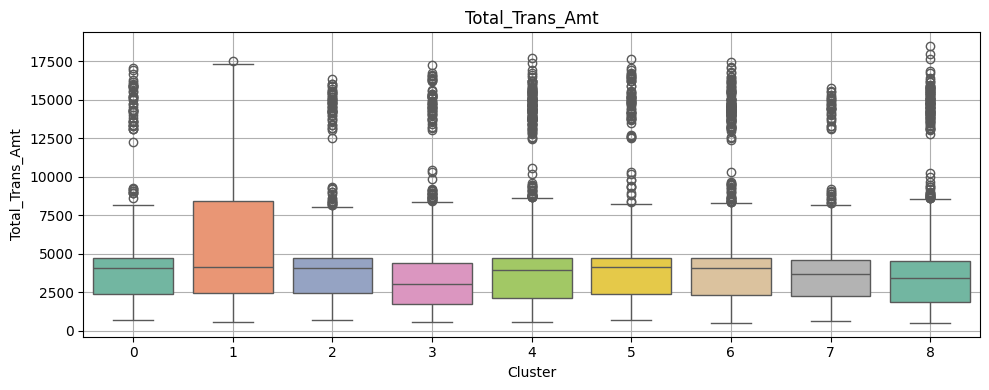

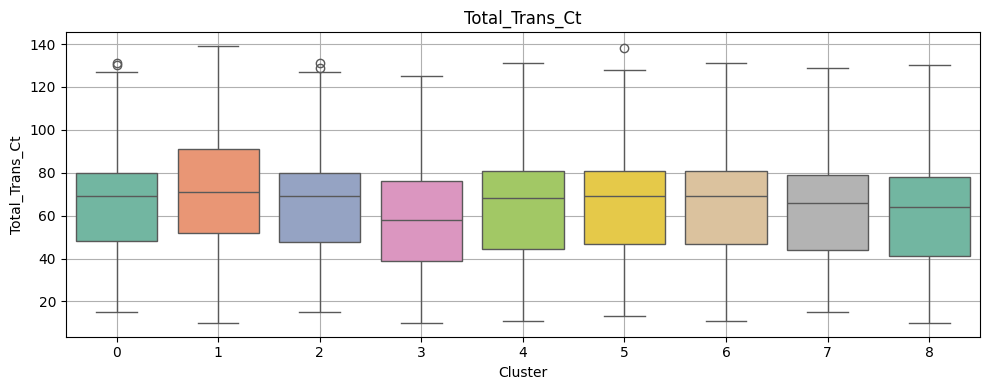

In [36]:
# Visualize "per cluster" results for the numerical columns
df["Cluster"] = labels
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x="Cluster", y=col,hue="Cluster", palette="Set2")
    plt.title(col)
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend().remove()
    plt.tight_layout()
    plt.show()

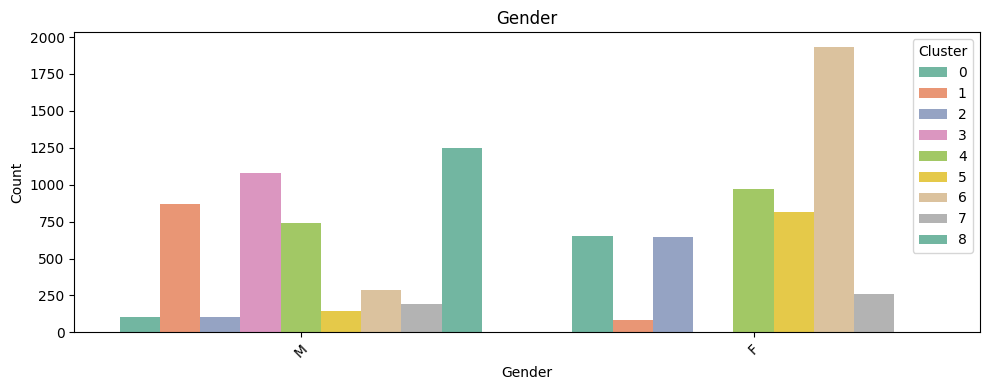

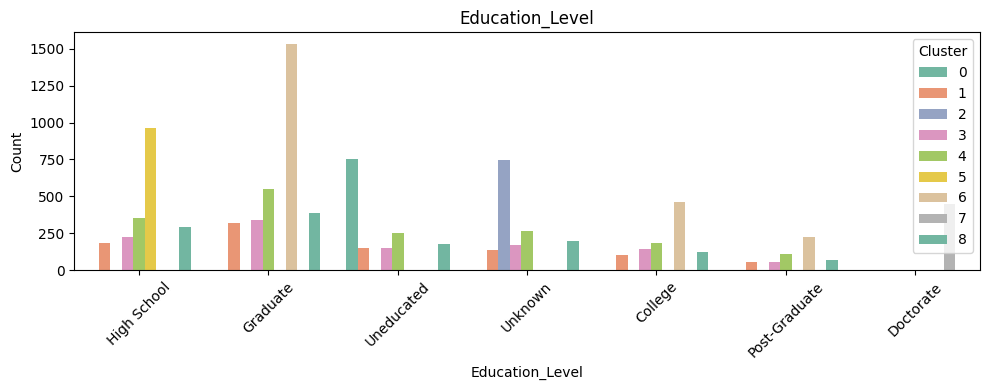

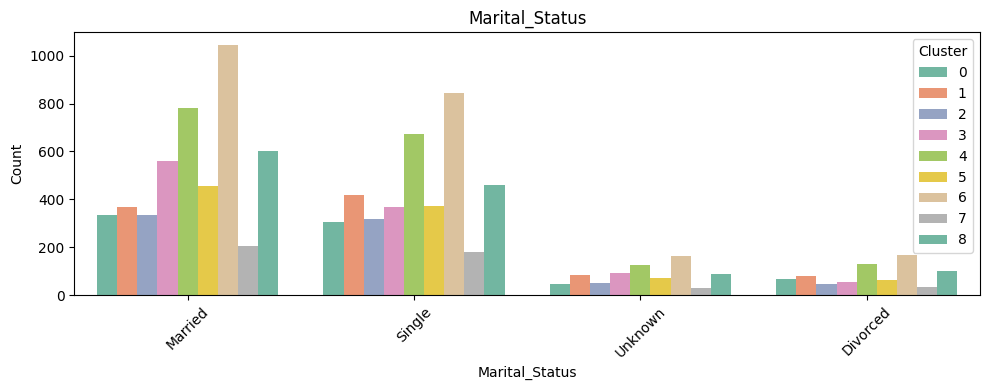

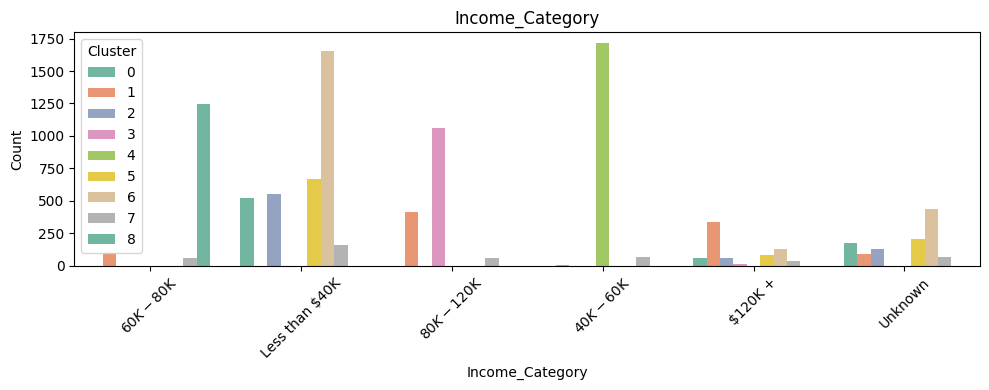

In [37]:
# Visualize "per cluster" results for the categorical columns
df2 = pd.read_excel("Customer Segmentation Dataset.xlsx")
df2["Cluster"] = labels
df2.drop(columns=["Attrition_Flag", "Card_Category"], inplace=True)
cat_cols = df2.select_dtypes(include=["object"]).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df2, x=col, hue="Cluster", palette="Set2")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()